# Classifying SMS as ham and spam with Naive Bayes Classifier

#### This program basically evaluate SMS Spam data set by applying basic text preprocessing, evaluating tf-idf score and applying Naive Bayes classifier with pipeline

In [38]:
#Reading the dataset
import pandas as pd
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
#Exploring the dataset
messages.describe()
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

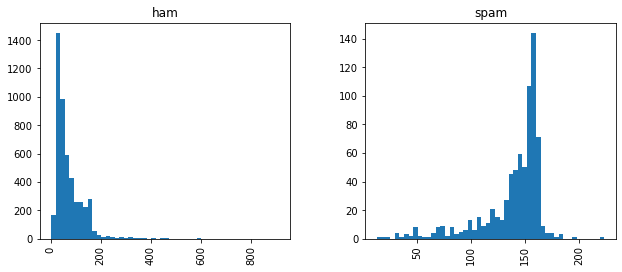

In [40]:
#Plotting histogram based on message length for ham and spam
messages['length'] = messages['message'].apply(len)
messages.groupby('label').describe()
messages.length.describe()
messages.hist(column='length', by='label', bins=50,figsize=(10,4))

In [41]:
#Downloading the stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
#Applying basic text preprocessing like removing punctuations and stop words.
import string
from nltk.corpus import stopwords
#Function to check character to see if there are any punctuations and join back characters to form strings and removing
#stop words
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [43]:
#Applying count vectorizer on message column to convert strings to token integer counts
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
len(bow_transformer.vocabulary_)

11425

In [44]:
#Transforming the dataset
messages_bow = bow_transformer.transform(messages['message'])
print ('Shape of Sparse Matrix: ', messages_bow.shape)
print ('Amount of Non-Zero occurences: ', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


In [45]:
#Fitting the dataset for integer counts to weighted TF-IDF scores
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [46]:
#Transforming the dataset
messages_tfidf = tfidf_transformer.transform(messages_bow)
print (messages_tfidf.shape)

(5572, 11425)


In [48]:
#Applying MultinomialNB Classifier to train on TF-IDF vectors with Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [50]:
#Creating pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()), 
    ('classifier', MultinomialNB()), 
])

In [49]:
#Splitting to train and test data set
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print (len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [51]:
#Training and testing
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)

In [52]:
#Determining accuracy,precision,recal and f1-score
from sklearn.metrics import classification_report
print (classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1004
        spam       0.76      1.00      0.86       111

    accuracy                           0.97      1115
   macro avg       0.88      0.98      0.92      1115
weighted avg       0.98      0.97      0.97      1115

